In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')


In [8]:
from sklearn import model_selection, metrics
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
test.head().sum()

PassengerId                                                 4470
Pclass                                                        14
Name           Kelly, Mr. JamesWilkes, Mrs. James (Ellen Need...
Sex                                     malefemalemalemalefemale
Age                                                        192.5
SibSp                                                          2
Parch                                                          1
Ticket                           3309113632722402763151543101298
Fare                                                     45.4667
Cabin                                                          0
Embarked                                                   QSQSS
dtype: object

In [77]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [80]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
passengerId = test['PassengerId']
titanic_combined = pd.concat([train, test], ignore_index=True)


In [11]:
train_index = len(train)
test_index = len(titanic_combined) - len(test)


In [100]:
titanic_combined


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [101]:
titanic_combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [102]:
df = pd.DataFrame()

In [ ]:
# Tratar colunas com valores ausentes

In [104]:
titanic_combined['Survived'].nunique()

2

In [105]:
titanic_combined['Survived'].unique()

array([ 0.,  1., nan])

In [106]:
titanic_combined['Survived'].isnull().sum()

np.int64(418)

In [107]:
# qtd dos valores
titanic_combined['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

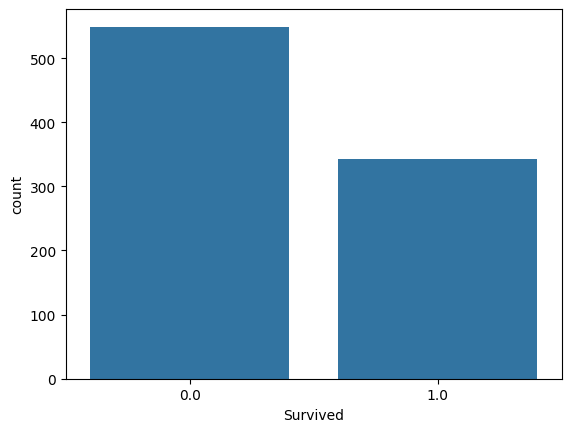

In [108]:
sns.countplot(data = titanic_combined, x='Survived')

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
 Survived
0.0    549
1.0    342
Name: count, dtype: int64


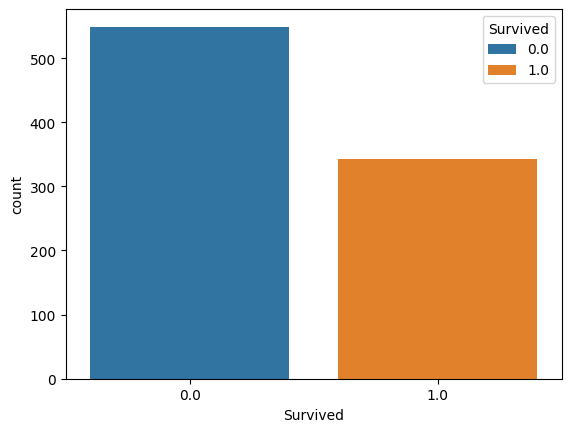

In [119]:
from itertools import count

#Função para fazer od passos anteriores para tratar outras colunas sem precisar reescrever o código
def titanic_tratarColunas(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n {data[column].value_counts()}')

    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True )


titanic_tratarColunas(titanic_combined,'Survived')

In [120]:
df['Survived'] = titanic_combined['Survived']

In [121]:
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


In [122]:
###Pclass


Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
 Pclass
3    709
1    323
2    277
Name: count, dtype: int64


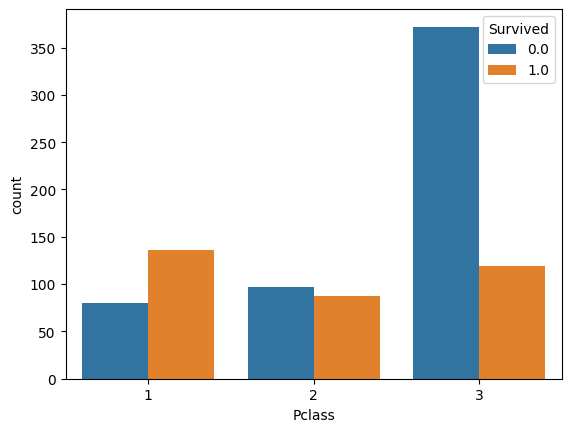

In [123]:
titanic_tratarColunas(titanic_combined,'Pclass')

In [126]:
df['Pclass'] = titanic_combined['Pclass']
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


In [128]:
titanic_combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [132]:
###Sex
titanic_combined['Sex'] = titanic_combined['Sex'].replace(['male','female'], [0,1])

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
 Sex
0    843
1    466
Name: count, dtype: int64


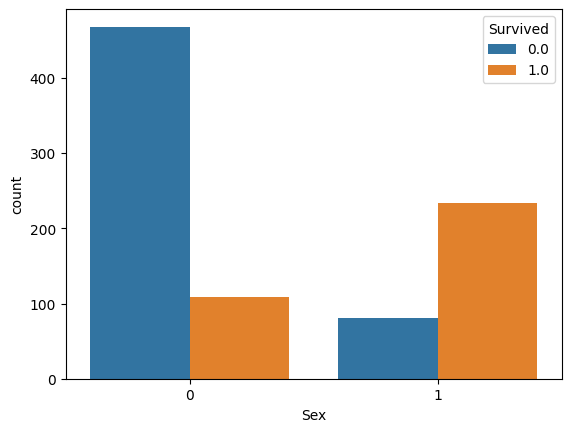

In [133]:
titanic_tratarColunas(titanic_combined,'Sex')

In [ ]:
# Convert 'Sex' to numerical values (0 for male, 1 for female)
titanic_combined['Sex'] = titanic_combined['Sex'].replace(['male','female'], [0,1])

In [137]:
df['Sex'] = titanic_combined['Sex']


In [138]:
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


In [ ]:
##Age

In [ ]:
titanic_tratarColunas(titanic_combined,'Age', False)


In [139]:
# Fill missing 'Age' values with the median
for i in sorted(titanic_combined['Pclass'].unique()):
   print(f'Pessoas da {i} classe tem a média de idade de: {titanic_combined[titanic_combined["Pclass"]==i]["Age"].mean()}')

Pessoas da 1 classe tem a média de idade de: 39.15992957746479
Pessoas da 2 classe tem a média de idade de: 29.506704980842912
Pessoas da 3 classe tem a média de idade de: 24.81636726546906


In [140]:
titanic_combined['Age'].isnull().sum()

np.int64(263)

In [160]:
titanic_combined.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [161]:
names = titanic_combined['Name']
if isinstance(names, pd.DataFrame):
    names = names.squeeze()  # mais robusto que iloc[:, 0]

titanic_combined['Title'] = names.astype(str).str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()

title_map = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare',
    'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare',
    'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'
}
titanic_combined['Title'] = titanic_combined['Title'].replace(title_map).fillna('Rare')

titanic_combined['Age'] = titanic_combined['Age'].fillna(
    titanic_combined.groupby(['Title', 'Pclass'])['Age'].transform('median')
)
titanic_combined['Age'] = titanic_combined['Age'].fillna(
    titanic_combined.groupby('Title')['Age'].transform('median')
)
titanic_combined['Age'] = titanic_combined['Age'].fillna(titanic_combined['Age'].median())

# usar inteiro anulável para evitar erro se ainda houver NaN
titanic_combined['Age'] = titanic_combined['Age'].round().astype('Int64')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108.9000,C105,C,Rare
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25,0,0,359309,8.0500,NaN,S,Mr


In [203]:
df['Title'] = titanic_combined['Title']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0.0,3,0,22,1,0,2,7.2500,S,Mr
1,1.0,1,1,38,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26,0,0,1,7.9250,S,Miss
3,1.0,1,1,35,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39,0,0,1,108.9000,C,Rare
1306,NaN,3,0,38,0,0,1,7.2500,S,Mr
1307,NaN,3,0,25,0,0,1,8.0500,S,Mr


In [162]:
titanic_combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [163]:
df['Age'] = titanic_combined['Age']

In [164]:
df

,Survived,Pclass,Sex,Age
0,0.0,3,0,22
1,1.0,1,1,38
2,1.0,3,1,26
3,1.0,1,1,35
4,0.0,3,0,35
...,...,...,...,...
1304,NaN,3,0,25
1305,NaN,1,1,39
1306,NaN,3,0,38
1307,NaN,3,0,25


In [165]:
###SibSP

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
 SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


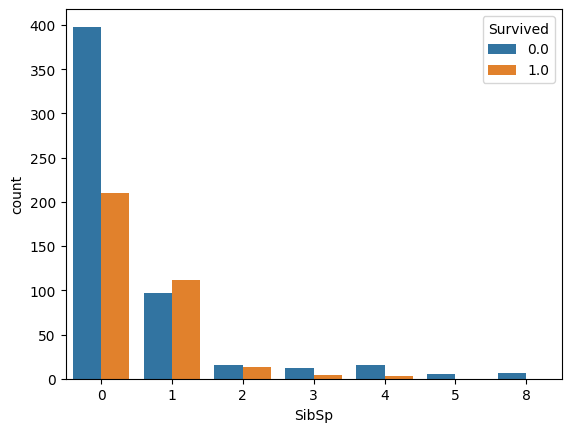

In [166]:
titanic_tratarColunas(titanic_combined,'SibSp')


In [167]:
df['SibSp'] = titanic_combined['SibSp']
df

,Survived,Pclass,Sex,Age,SibSp
0,0.0,3,0,22,1
1,1.0,1,1,38,1
2,1.0,3,1,26,0
3,1.0,1,1,35,1
4,0.0,3,0,35,0
...,...,...,...,...,...
1304,NaN,3,0,25,0
1305,NaN,1,1,39,0
1306,NaN,3,0,38,0
1307,NaN,3,0,25,0


In [168]:
titanic_combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108.9000,C105,C,Rare
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25,0,0,359309,8.0500,NaN,S,Mr


Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opção: 
 Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


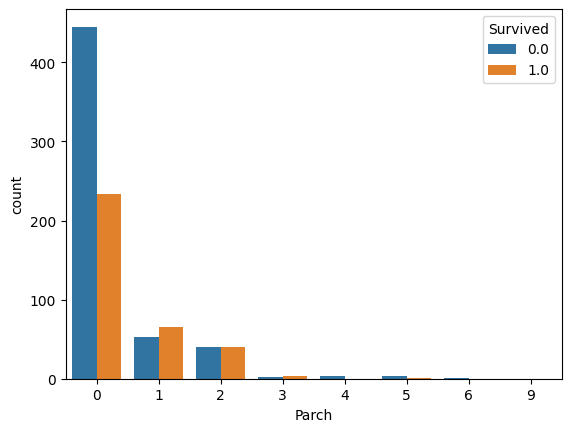

In [169]:
#Parch
titanic_tratarColunas(titanic_combined,'Parch')

In [170]:
df['Parch'] = titanic_combined['Parch']
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,3,0,22,1,0
1,1.0,1,1,38,1,0
2,1.0,3,1,26,0,0
3,1.0,1,1,35,1,0
4,0.0,3,0,35,0,0
...,...,...,...,...,...,...
1304,NaN,3,0,25,0,0
1305,NaN,1,1,39,0,0
1306,NaN,3,0,38,0,0
1307,NaN,3,0,25,0,0


In [171]:
#FamilySize
titanic_combined['FamilySize'] = titanic_combined['SibSp'] + titanic_combined['Parch'] + 1

In [172]:
titanic_combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [173]:
df['FamilySize'] = titanic_combined['FamilySize']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0.0,3,0,22,1,0,2
1,1.0,1,1,38,1,0,2
2,1.0,3,1,26,0,0,1
3,1.0,1,1,35,1,0,2
4,0.0,3,0,35,0,0,1
...,...,...,...,...,...,...,...
1304,NaN,3,0,25,0,0,1
1305,NaN,1,1,39,0,0,1
1306,NaN,3,0,38,0,0,1
1307,NaN,3,0,25,0,0,1


Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

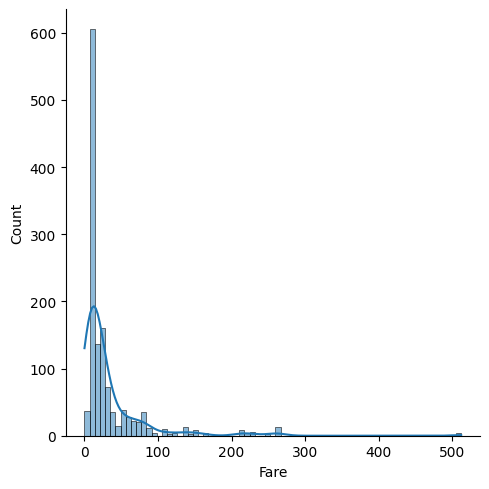

In [174]:
##Fare
titanic_tratarColunas(titanic_combined,'Fare', False)

In [175]:
titanic_combined[titanic_combined['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60,0,0,3701,NaN,NaN,S,Mr,1


In [177]:
titanic_combined[titanic_combined['Pclass']==3]['Fare'].mean()

np.float64(13.302888700564973)

In [179]:
titanic_combined['Fare'].fillna(titanic_combined[titanic_combined['Pclass']==3]['Fare'].mean(), inplace=True)

In [180]:
titanic_combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Title             0
FamilySize        0
dtype: int64

In [183]:
df['Fare'] = titanic_combined['Fare']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare
0,0.0,3,0,22,1,0,2,7.2500
1,1.0,1,1,38,1,0,2,71.2833
2,1.0,3,1,26,0,0,1,7.9250
3,1.0,1,1,35,1,0,2,53.1000
4,0.0,3,0,35,0,0,1,8.0500
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25,0,0,1,8.0500
1305,NaN,1,1,39,0,0,1,108.9000
1306,NaN,3,0,38,0,0,1,7.2500
1307,NaN,3,0,25,0,0,1,8.0500


In [186]:
titanic_combined['Cabin'].isnull().sum()

np.int64(1014)

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
 Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


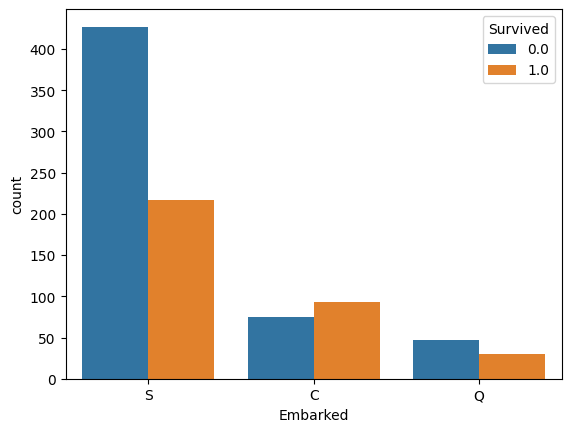

In [187]:
##Embarked
titanic_tratarColunas(titanic_combined,'Embarked')

In [189]:
titanic_combined[titanic_combined['Embarked'] == 'S']['Survived'].mean()

np.float64(0.33695652173913043)

In [193]:
titanic_combined[titanic_combined['Embarked'] == 'S']['Pclass'].mean()


np.float64(2.3479212253829322)

In [190]:
titanic_combined[titanic_combined['Embarked'] == 'C']['Survived'].mean()


np.float64(0.5535714285714286)

In [192]:
titanic_combined[titanic_combined['Embarked'] == 'C']['Pclass'].mean()


np.float64(1.8518518518518519)

In [191]:
titanic_combined[titanic_combined['Embarked'] == 'Q']['Survived'].mean()


np.float64(0.38961038961038963)

In [194]:
titanic_combined[titanic_combined['Embarked'] == 'Q']['Pclass'].mean()


np.float64(2.894308943089431)

In [195]:
titanic_combined[titanic_combined['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",1,38,0,0,113572,80.0,B28,NaN,Miss,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62,0,0,113572,80.0,B28,NaN,Mrs,1


In [196]:
titanic_combined['Embarked'].fillna("C", inplace=True)

In [198]:
titanic_combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
FamilySize        0
dtype: int64

In [199]:
df['Embarked'] = titanic_combined['Embarked']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked
0,0.0,3,0,22,1,0,2,7.2500,S
1,1.0,1,1,38,1,0,2,71.2833,C
2,1.0,3,1,26,0,0,1,7.9250,S
3,1.0,1,1,35,1,0,2,53.1000,S
4,0.0,3,0,35,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25,0,0,1,8.0500,S
1305,NaN,1,1,39,0,0,1,108.9000,C
1306,NaN,3,0,38,0,0,1,7.2500,S
1307,NaN,3,0,25,0,0,1,8.0500,S


In [200]:
##Name
titanic_combined['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [202]:
titanic_combined['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'the Countess'],
      dtype=object)

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0.0,3,0,22,1,0,2,7.2500,S,Mr
1,1.0,1,1,38,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26,0,0,1,7.9250,S,Miss
3,1.0,1,1,35,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39,0,0,1,108.9000,C,Rare
1306,NaN,3,0,38,0,0,1,7.2500,S,Mr
1307,NaN,3,0,25,0,0,1,8.0500,S,Mr


Quantidade de valores únicos: 6

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Rare' 'the Countess']

Quantidade de valores nulos: 0

Quantidade por opção: 
 Title
Mr              757
Miss            264
Mrs             198
Master           61
Rare             28
the Countess      1
Name: count, dtype: int64


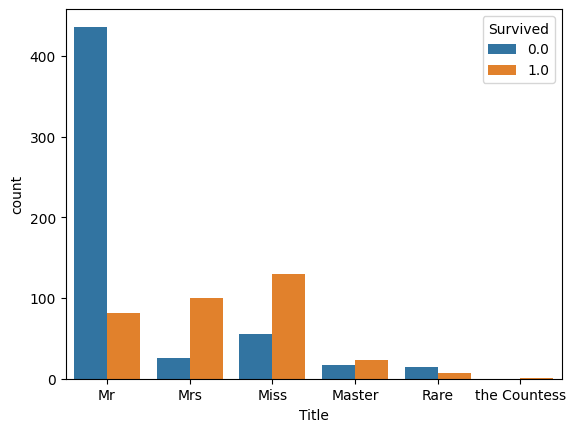

In [205]:
titanic_tratarColunas(titanic_combined,'Title')


In [206]:
pclass = pd.get_dummies(titanic_combined['Pclass'], prefix='Pclass', drop_first=True)
embarked = pd.get_dummies(titanic_combined['Embarked'], prefix='Embarked', drop_first=True)
title = pd.get_dummies(titanic_combined['Title'], prefix='Title', drop_first=True)

In [207]:
titanic_completo = pd.concat([df, pclass, embarked, title], axis=1)

In [208]:
titanic_completo.drop(['Pclass', 'Embarked', 'Title'], axis=1, inplace=True)

In [209]:
titanic_completo

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_the Countess
0,0.0,0,22,1,0,2,7.2500,False,True,False,True,False,True,False,False,False
1,1.0,1,38,1,0,2,71.2833,False,False,False,False,False,False,True,False,False
2,1.0,1,26,0,0,1,7.9250,False,True,False,True,True,False,False,False,False
3,1.0,1,35,1,0,2,53.1000,False,False,False,True,False,False,True,False,False
4,0.0,0,35,0,0,1,8.0500,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25,0,0,1,8.0500,False,True,False,True,False,True,False,False,False
1305,NaN,1,39,0,0,1,108.9000,False,False,False,False,False,False,False,True,False
1306,NaN,0,38,0,0,1,7.2500,False,True,False,True,False,True,False,False,False
1307,NaN,0,25,0,0,1,8.0500,False,True,False,True,False,True,False,False,False


In [210]:
train = titanic_completo[:train_index].copy()
test = titanic_completo[train_index:].copy()

In [213]:
train['Survived'] = train['Survived'].astype(int)


In [215]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [216]:
x_test = test.drop('Survived', axis=1)

In [218]:
def func_acuracia(algoritmo, x_train, y_train, vc):
   modelo = algoritmo.fit(x_train, y_train)
   acuracia = round(modelo.score(x_train, y_train) * 100, 2)

   train_pred = model_selection.cross_val_predict(algoritmo, x_train, y_train, cv = vc, n_jobs = -1)
   acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

   return acuracia, acuracia_vc


In [220]:
# Random forest
acc_rf, acc_rf_vc = func_acuracia(RandomForestClassifier(), x, y, 10)
print(f"Acurácia treino: {acc_rf}")
print(f"Acurácia validação cruzada: {acc_rf_vc}")

Acurácia treino: 98.32
Acurácia validação cruzada: 80.25


In [221]:
#Logistic regression
acc_lr, acc_lr_vc = func_acuracia(LogisticRegression(max_iter=1000), x,y,10)
print(f"Acurácia treino: {acc_lr}")
print(f"Acurácia validação cruzada: {acc_lr_vc}")

Acurácia treino: 82.94
Acurácia validação cruzada: 82.49


In [222]:
#K-nearest neighbors
acc_knn, acc_knn_vc = func_acuracia(KNeighborsClassifier(), x,y,10)
print(f"Acurácia treino: {acc_knn}")
print(f"Acurácia validação cruzada: {acc_knn_vc}")

Acurácia treino: 80.81
Acurácia validação cruzada: 72.62


In [223]:
#Gaussion naive bayes
acc_gnb, acc_gnb_vc = func_acuracia(GaussianNB(), x,y,10)
print(f"Acurácia treino: {acc_gnb}")
print(f"Acurácia validação cruzada: {acc_gnb_vc}")

Acurácia treino: 80.02
Acurácia validação cruzada: 79.8


In [233]:
from sklearn.svm import LinearSVC

acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual=False), x, y, 10)
print(f"Acurácia treino: {acc_linear_svc}")
print(f"Acurácia validação cruzada: {acc_vc_linear_svc}")


Acurácia treino: 83.28
Acurácia validação cruzada: 82.83


In [234]:
##Gradient Boosting Classifier
acc_gbc, acc_gbc_vc = func_acuracia(GradientBoostingClassifier(), x,y,10)
print(f"Acurácia treino: {acc_gbc}")
print(f"Acurácia validação cruzada: {acc_gbc_vc}")

Acurácia treino: 90.24
Acurácia validação cruzada: 83.5


In [235]:
#sTOCHASTIC GRADIENT DESCENT CLASSIFIER
acc_sgd, acc_sgd_vc = func_acuracia(SGDClassifier(), x,y,10)
print(f"Acurácia treino: {acc_sgd}")
print(f"Acurácia validação cruzada: {acc_sgd_vc}")

Acurácia treino: 62.4
Acurácia validação cruzada: 73.06


In [236]:
#dECISION TREE CLASSIFIER
acc_dtc, acc_dtc_vc = func_acuracia(DecisionTreeClassifier(), x,y,10)
print(f"Acurácia treino: {acc_dtc}")
print(f"Acurácia validação cruzada: {acc_dtc_vc}")

Acurácia treino: 98.32
Acurácia validação cruzada: 79.35


In [247]:
#Grasient boost Classifier
acc_gbt, acc_gbt_vc = func_acuracia(GradientBoostingClassifier(), x,y,10)
print(f"Acurácia treino: {acc_gbt}")
print(f"Acurácia validação cruzada: {acc_gbt_vc}")

Acurácia treino: 90.24
Acurácia validação cruzada: 83.61


In [251]:
params = dict(
    max_depth = [n for n in range(1,5)],
    min_samples_split = [n for n in range (2, 6)],
    min_samples_leaf = [n for n in range(2, 6)],
    n_estimators = [n for n in range (10, 50, 10)]
)

In [252]:
gbt = GradientBoostingClassifier()


In [254]:
gbt_vc = GridSearchCV(estimator = gbt, param_grid = params, cv = 10)

In [259]:
gbt_vc.fit(x,y)

,estimator,GradientBoostingClassifier()
,param_grid,"{'max_depth': [1, 2, ...], 'min_samples_leaf': [2, 3, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [10, 20, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [260]:
print(f'Best pontuação: {gbt_vc.best_score_}')

Best pontuação: 0.8462546816479402


In [262]:
print(f'Best parâmetros: {gbt_vc.best_estimator_}')


Best parâmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                           n_estimators=30)


In [263]:
gradientBoostingClassifier_prod = gbt_vc.predict(x_test)


In [264]:
kaggle = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': gradientBoostingClassifier_prod
})

In [266]:
kaggle.to_csv('titanic_gradient_boosting.csv', index=False)


In [267]:
kaggle

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
